## Time-Series data

시계열이란 시간 순서대로 발생한 데이터의 수열이라는 뜻

과거의 데이터에 일정한 패턴이 발견된다 + 과거의 패턴은 미래에도 동일하게 반복될 것이다
-> 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다.

> Q : 안정적인 시계열에서 시간의 추이에 관계없이 일정해야 하는 통계적 특성 세가지?
>
> A : 평균, 분산, 공분산(그러나 정확히는 자기공분산-autocovariance이라고 해야 함)

## Covariance & Correlation

### 1. Cov(X,Y)

cov : 두 변수 사이 퍼진 정도?를 수치화. 
    - cov > 0 : 비례 관계
    - cov < 0 : 반비례 관계
    - cov = 0 : 독립
cor : cov를 -1 ~ 1 사이로 normalization

$ mkdir -p ~/aiffel/stock_prediction/data

$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

$ mv daily-min-temperatures.csv airline-passengers.csv ~/aiffel/stock_prediction/data


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams

In [4]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

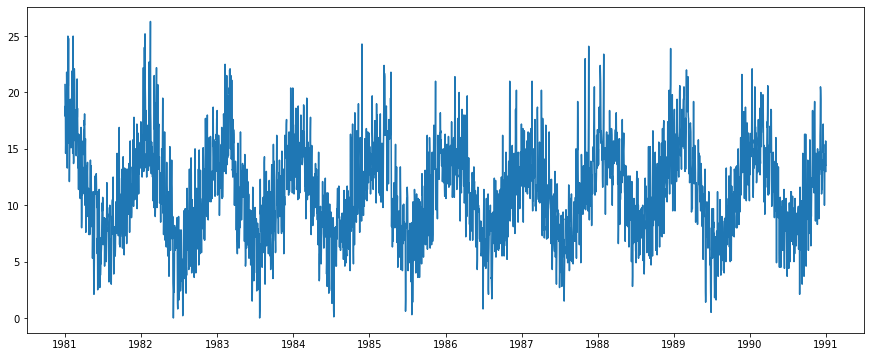

In [6]:
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [8]:
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

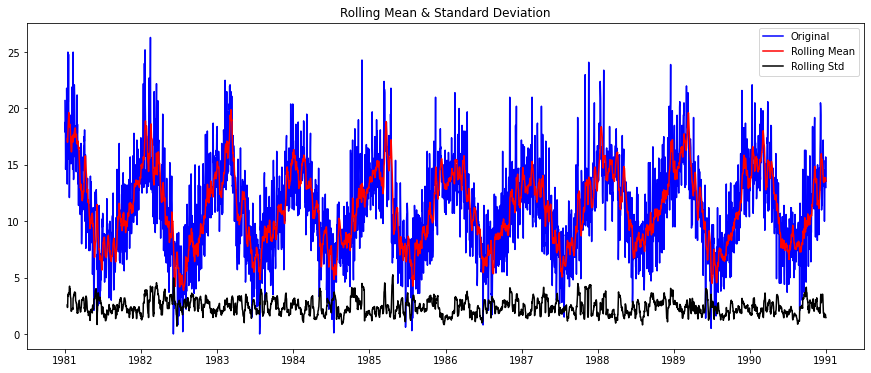

In [9]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
   

plot_rolling_statistics(ts1, window=12)